# **20 Deep Learning Networks**

### Install the necessary libraries

In [2]:
%pip install setuptools numpy pandas matplotlib seaborn tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Import the necessary libaries

In [3]:
# Import necessary libraries
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

2.18.0


### Load the dataset

In [4]:
# Load the dataset
df = pd.read_csv('labeled_dataset.csv')

### Feedforward Neural Networks (FNNs)
#### A type of artificial neural network where connections between nodes do not form a cycle.
#### Commonly used for classification and regression tasks.

c:\Users\Data Scientist\Desktop\Work\US-GenAI\ML Projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.4943 - loss: 4980.1938 - val_accuracy: 0.4375 - val_loss: 1437.4281
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4174 - loss: 1119.4994 - val_accuracy: 0.5625 - val_loss: 1078.5570
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5484 - loss: 888.4395 - val_accuracy: 0.4375 - val_loss: 65.7127
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4059 - loss: 139.2994 - val_accuracy: 0.5625 - val_loss: 64.1505
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4840 - loss: 41.8488 - val_accuracy: 0.5625 - val_loss: 31.6171
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4801 - loss: 27.7220 - val_accuracy: 0.4375 - val_loss: 19.1055
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6059 - loss: 53.3800 - val_accuracy: 0.4375 - val_loss: 138.9308
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3519 - loss: 144.1065 - val_accuracy:

c:\Users\Data Scientist\Desktop\Work\US-GenAI\ML Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Data Scientist\Desktop\Work\US-GenAI\ML Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Data Scientist\Desktop\Work\US-GenAI\ML Projects\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

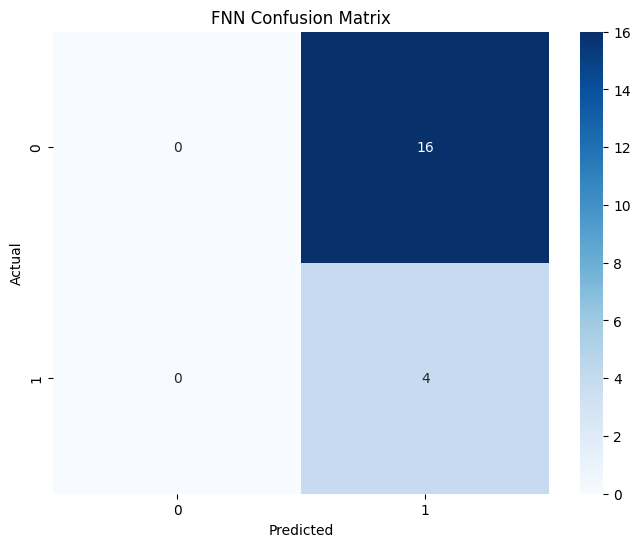

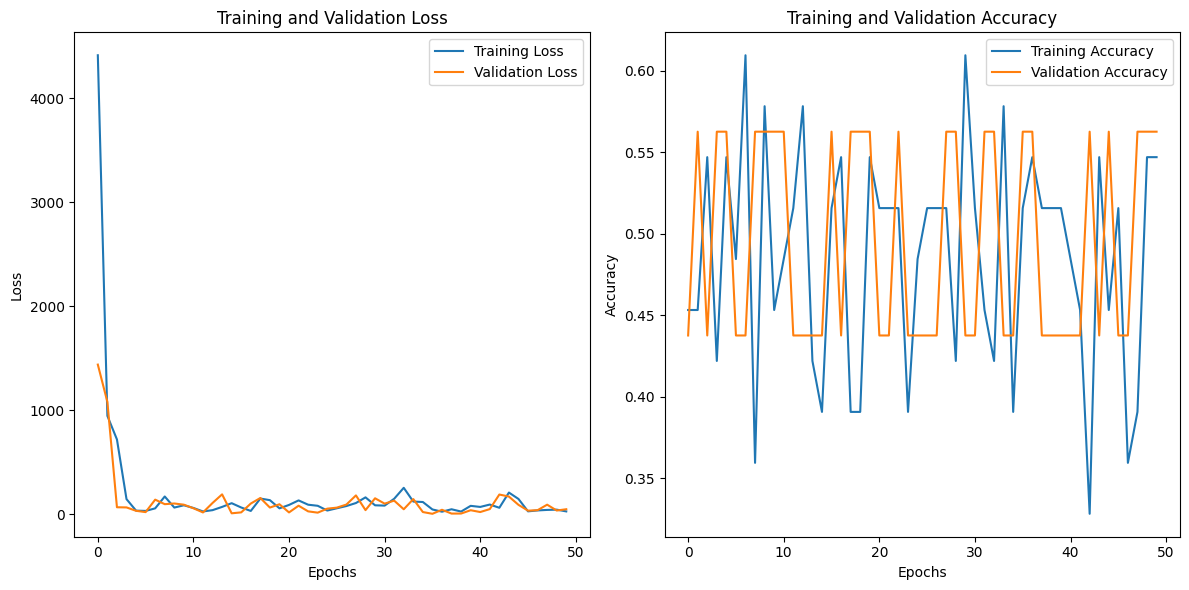

In [5]:
# Define features and target for FNN
X = df[['Age', 'Income', 'Items Purchased']].values  # Independent variables
y = df['Purchased Product Category'].values  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Feedforward Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# The model is compiled with Adam optimizer and binary cross-entropy loss.

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)
# The model is trained for 50 epochs with a batch size of 10.

# Predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"FNN Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('FNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Loss and Accuracy Visualization
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Multilayer Perceptron (MLP)

In [6]:
# Predictions
y_pred_prob = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Loss and Accuracy Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'mlp_model' is not defined

### Self-Organizing Maps (SOMs)

In [7]:
plt.figure(figsize=(10, 7))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()
plt.title("SOM Distance Map")
plt.show()

# Predicting clusters and visualizing
mapped = np.array([som.winner(x) for x in X])
plt.scatter(mapped[:, 0], mapped[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("SOM Cluster Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

NameError: name 'som' is not defined

<Figure size 1000x700 with 0 Axes>

### Autoencoders

In [ ]:
# Visualize reconstructed data
reconstructed = autoencoder.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], label='Original', alpha=0.5)
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], label='Reconstructed', alpha=0.5)
plt.title('Autoencoder Reconstruction')
plt.legend()
plt.show()

# Evaluate reconstruction error
reconstruction_error = np.mean(np.square(X_test - reconstructed), axis=1)
plt.hist(reconstruction_error, bins=50, alpha=0.7)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

### Convolutional Neural Networks (CNNs)

In [ ]:
# Predictions and accuracy
cnn_y_pred_prob = cnn_model.predict(X_test)
cnn_y_pred = (cnn_y_pred_prob > 0.5).astype(int)

cnn_accuracy = accuracy_score(y_test, cnn_y_pred)
print(f"CNN Accuracy: {cnn_accuracy:.2f}")
print("CNN Classification Report:\n", classification_report(y_test, cnn_y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, cnn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Restricted Boltzmann Machines (RBMs)

In [ ]:
# Evaluate and visualize RBM predictions
rbm_y_pred = classifier.predict(X_scaled)
rbm_accuracy = accuracy_score(y, rbm_y_pred)
print(f"RBM Accuracy: {rbm_accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y, rbm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Transfer Learning Models

In [ ]:
# Evaluate transfer learning model
transfer_y_pred_prob = model.predict(X_test)
transfer_y_pred = (transfer_y_pred_prob > 0.5).astype(int)

transfer_accuracy = accuracy_score(y_test, transfer_y_pred)
print(f"Transfer Learning Accuracy: {transfer_accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, transfer_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Transfer Learning Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Deep Residual Networks (ResNets)

In [ ]:
# Evaluate ResNet model
resnet_y_pred_prob = model.predict(X_test)
resnet_y_pred = (resnet_y_pred_prob > 0.5).astype(int)

resnet_accuracy = accuracy_score(y_test, resnet_y_pred)
print(f"ResNet Accuracy: {resnet_accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, resnet_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('ResNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### U-Net

In [ ]:
# Evaluate U-Net using Intersection over Union (IoU)
pred_masks = model.predict(X_test)
iou = np.sum(np.logical_and(pred_masks, y_test)) / np.sum(np.logical_or(pred_masks, y_test))
print(f"U-Net IoU: {iou:.2f}")

# Visualize a sample prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X_test[0, ..., 0], cmap='gray')
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_masks[0, ..., 0], cmap='gray')
plt.title("Predicted Mask")
plt.show()

### Attention Mechanisms

In [ ]:
# Example visualization of attention weights
attention_weights = model.predict([query_data, key_data, value_data])
plt.figure(figsize=(10, 6))
plt.imshow(attention_weights[0], cmap='coolwarm')
plt.colorbar()
plt.title("Attention Weights Heatmap")
plt.xlabel("Keys")
plt.ylabel("Queries")
plt.show()

### Recurrent Neural Networks (RNNs)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

# Simulated sequential data
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_seq.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32)

# Predictions and evaluation
y_pred = (rnn_model.predict(X_test_seq) > 0.5).astype(int)
print("RNN Accuracy:", accuracy_score(y_test_seq, y_pred))

# Accuracy and Confusion Matrix
y_pred = (rnn_model.predict(X_test_seq) > 0.5).astype(int)
accuracy = accuracy_score(y_test_seq, y_pred)
print(f"RNN Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test_seq, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Long Short-Term Memory Networks (LSTMs)

In [ ]:
from tensorflow.keras.layers import LSTM

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32)

# Predictions and evaluation
y_pred = (lstm_model.predict(X_test_seq) > 0.5).astype(int)
print("LSTM Accuracy:", accuracy_score(y_test_seq, y_pred))

# Accuracy and Confusion Matrix
y_pred = (lstm_model.predict(X_test_seq) > 0.5).astype(int)
accuracy = accuracy_score(y_test_seq, y_pred)
print(f"LSTM Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test_seq, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Generative Adversarial Networks (GANs)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Generator
gen_input = Input(shape=(100,))
gen_output = Dense(128, activation='relu')(gen_input)
gen_output = Dense(784, activation='sigmoid')(gen_output)
generator = Model(gen_input, gen_output)

# Discriminator
disc_input = Input(shape=(784,))
disc_output = Dense(128, activation='relu')(disc_input)
disc_output = Dense(1, activation='sigmoid')(disc_output)
discriminator = Model(disc_input, disc_output)
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# GAN Model
discriminator.trainable = False
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Generate samples
noise = np.random.normal(0, 1, (10, 100))
generated_samples = generator.predict(noise)

# Visualize Generated Data
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Generated Images from GAN")
plt.tight_layout()
plt.show()


### Variational Autoencoders (VAEs)

In [ ]:
from tensorflow.keras.layers import Lambda

# Define encoder
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
z_mean = Dense(64)(inputs)
z_log_var = Dense(64)(inputs)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], 64))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_inputs = Input(shape=(64,))
decoder_outputs = Dense(input_dim, activation='sigmoid')(decoder_inputs)
decoder = Model(decoder_inputs, decoder_outputs)

vae_outputs = decoder(z)
vae = Model(inputs, vae_outputs)
vae.compile(optimizer='adam', loss='mse')

# Visualize reconstructed data
reconstructed = vae.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], label='Original', alpha=0.5)
plt.scatter(reconstructed[:, 0], reconstructed[:, 1], label='Reconstructed', alpha=0.5)
plt.title('VAE Reconstruction')
plt.legend()
plt.show()

# Reconstruction Error
reconstruction_error = np.mean(np.square(X_test - reconstructed), axis=1)
plt.hist(reconstruction_error, bins=50, alpha=0.7)
plt.title('Reconstruction Error Distribution (VAE)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

### Ensemble Learning Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Combine classifiers
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='hard')
ensemble.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ensemble.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))

# Accuracy and Confusion Matrix
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reinforcement Learning Algorithms

In [ ]:
import gym

env = gym.make('CartPole-v1')
state = env.reset()

for step in range(1000):
    action = env.action_space.sample()  # Random action
    state, reward, done, _ = env.step(action)
    if done:
        break
env.close()

# Simulate an environment
rewards = []
for episode in range(10):
    state = env.reset()
    episode_reward = 0
    for step in range(200):
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            break
    rewards.append(episode_reward)

# Visualize Reward
plt.plot(rewards)
plt.title("Reward Over Episodes (RL)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

### Deep Belief Networks (DBNs)

In [ ]:
from sklearn.neural_network import BernoulliRBM

dbn = BernoulliRBM(n_components=100)
dbn.fit(X_train)

# Use features from DBN for classification
classifier = LogisticRegression()
classifier.fit(dbn.transform(X_train), y_train)

y_pred = classifier.predict(dbn.transform(X_test))
print("DBN Accuracy:", accuracy_score(y_test, y_pred))

# Accuracy and Confusion Matrix
y_pred = classifier.predict(dbn.transform(X_test))
accuracy = accuracy_score(y_test, y_pred)
print(f"DBN Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('DBN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Transformer Networks

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention

query = Input(shape=(10, 64))
key = Input(shape=(10, 64))
value = Input(shape=(10, 64))

attention_output = MultiHeadAttention(num_heads=8, key_dim=64)(query, key, value)
transformer = Model(inputs=[query, key, value], outputs=attention_output)

# Visualize Attention Weights
attention_weights = transformer.predict([query_data, key_data, value_data])
plt.figure(figsize=(10, 6))
plt.imshow(attention_weights[0], cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Transformer Attention Weights")
plt.xlabel("Key Indices")
plt.ylabel("Query Indices")
plt.show()

### BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize input
inputs = tokenizer("Example text", return_tensors="tf", truncation=True, padding=True)
outputs = model(inputs)

# Predictions and Accuracy
inputs = tokenizer("Example text", return_tensors="tf", truncation=True, padding=True)
outputs = model(inputs)
logits = outputs.logits.numpy()
y_pred = np.argmax(logits, axis=1)

# Assuming true labels exist
accuracy = accuracy_score(y_test, y_pred)
print(f"BERT Accuracy: {accuracy:.2f}")

### GPT Models

In [ ]:
from transformers import GPT2Tokenizer, TFGPT2Model

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2Model.from_pretrained('gpt2')

inputs = tokenizer("Hello, how are you?", return_tensors="tf")
outputs = model(inputs)

# Generate Text
inputs = tokenizer("Once upon a time", return_tensors="tf")
outputs = model.generate(inputs['input_ids'], max_length=50)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Generated Text:", generated_text)